# Estructura Proyecto
El presente trabajo fue desarrollado para el modulo de **Introducción a Machine Learning con Python** de la Universidad Nacional De Colombia - Facultad de Ingeniería sede Bogotá por los estudiantes : 

* Mateo Gutiérrez Melo - mgutierrezca@unal.edu.co
* Sergio Alejandro Sanchez Ortiz - sesanchezo@unal.edu.co, chechoo.alejandro@gmail.com

# 0.Importaciones e Instalaciones

En esta sección se encuentran los comandos que instalan e importan librerias necesarias para el desarrollo del proyecto

In [ ]:
!pip install gdown
!pip install -U scikit-learn 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import sklearn
import seaborn as sns
import keras
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import PIL
import io
import PIL
import io
from PIL import Image
from IPython.display import Image
from PIL import Image
from IPython.display import Image
import cv2

In [ ]:
#TEST_CELL
!pip install -U plotly
import plotly
import plotly.express as px

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Este proyecto se realizó con las siguientes versiones:
*  *Python*: 3.7.15
*  *NumPy*:  1.21.6
*  *Pandas*:  1.3.5
*  *Matplotlib*:  3.2.2
*  *Scikit-learn*:  1.0.2
*  *Keras*: 2.9.0

In [ ]:
!python --version
print('NumPy', np.__version__)
print('Pandas', pd.__version__)
print('Matplotlib', mpl.__version__)
print('Scikit-learn', sklearn.__version__)
print('Keras', keras.__version__)

Python 3.7.15
NumPy 1.21.6
Pandas 1.3.5
Matplotlib 3.2.2
Scikit-learn 1.0.2
Keras 2.9.0


# 1.Entendimiento del negocio 
----

La lengua de señas colombiana es el lenguaje por el cuál se comunican las personas sordas, las cuales se estiman que hay alrededor de **560.000** en Colombia según el DANE. Dicho lenguaje contiene una grámatica propia y difere de algunas otras debido a contextos sociales y culturales del país.



## Objetivo General
----

* Desarrollar un modelo de aprendizaje de maquina que sirva para entender y clasificar las señas del lenguaje de señas colombiano (LSC) en vivo para que las personas que no conocen este lenguaje puedan entender lo que quieren decir las personas sordas o quienes se esten comunicando por medio de ese idioma.


## Objetivo Especifico

-----

* Analizar un conjunto de datos con señas para entender los significados que estas poseen

* Diseñar un modelo que pueda clasificar y enunciar las señas que se estan procesando en tiempo real


# 2.Entendimiento de los datos
----

## 2.1 Descarga de conjunto de datos

-----

A continuación se presenta la descarga y uso de los conjuntos de datos con las señas provenientes del lenguaje de señas. 


In [ ]:
!gdown https://drive.google.com/uc?id=1Aakg6T3dwsWFCY8mnJ-1YtxZAfO0HH8c
!gdown https://drive.google.com/uc?id=19J9EfAOM9uriPo-Bu67pYRI1P0P_HRAu

Downloading...
From: https://drive.google.com/uc?id=1Aakg6T3dwsWFCY8mnJ-1YtxZAfO0HH8c
To: /content/sign_mnist_test.csv
100% 21.8M/21.8M [00:00<00:00, 119MB/s] 
Downloading...
From: https://drive.google.com/uc?id=19J9EfAOM9uriPo-Bu67pYRI1P0P_HRAu
To: /content/sign_mnist_train.csv
100% 83.3M/83.3M [00:00<00:00, 97.6MB/s]


Se crearán dos conjuntos de datos los cuales serán importante para la creación, ajuste y uso del modelo. Dichos conjuntos son los de entrenamiento y de prueba, el primer conjunto cuenta con 27455 imagenes que serán usada para entrenar el modelo y el otro dataset cuenta con 7172 imagenes las cuales serán usadas para ajustar y mejorar el modelo

In [ ]:
train_df = pd.read_csv("./sign_mnist_train.csv")
test_df = pd.read_csv("./sign_mnist_test.csv")


## 2.2 Descripción de los datos 
----

A continuación se describirán los datos que se usarán en el proyecto los cuales contiene las siguientes caracteristicas:

* Pixeles entre los rangos de 1 y 784 
* Label


In [ ]:
train_df.head(3)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195


In [ ]:
test_df.head(3)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222


## 2.3 Visualización de datos

----

A continuacións se muestran las imagenes en un tamaño de **(28x28)** 

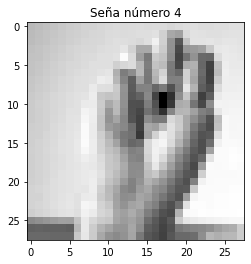

In [ ]:
def show_image(index):
  plt.imshow(train_df.drop(["label"], axis=1).values[index].reshape((28, 28)), cmap="gray")
  plt.title("Seña número {}".format(index))

show_image(4)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


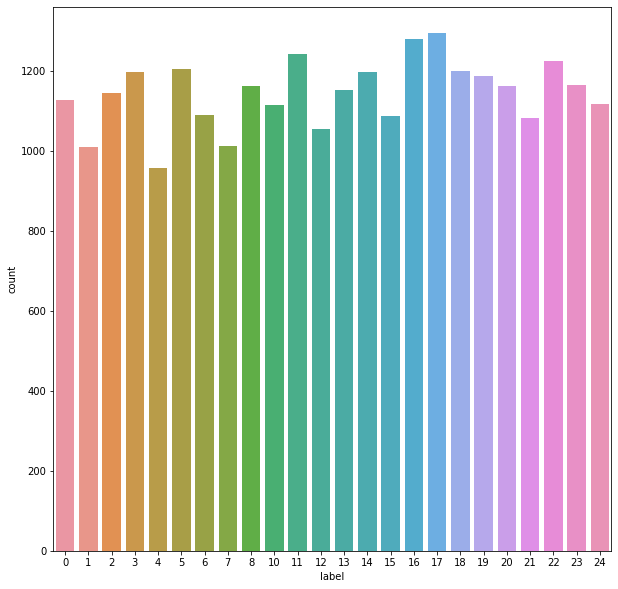

In [ ]:
plt.figure(figsize = (10,10))
sns.countplot(train_df['label'])

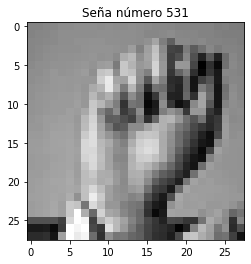

In [ ]:

index = 531 #@param {type:"slider", min:0, max:755, step:1}
show_image(index)

## 2.4 Creación de conjuntos de entrenamiento y de prueba

----

Para entrenar el modelo es necesario contar con dps conjuntos de datos los cuales ya fueron instanciados. Sin embargo, es importante eliminar la columna de label de dicho dataset para el conjunto de entrenamiento debido a que unicamente debemos enfocarnos en los pixeles y la información que estos contienen. Y para el conjunto de prueba nos enfocaremos en la etiqueta o **target** de label que nos dice a que tipo de seña se refiere


In [ ]:
X_train = train_df.drop(["label"], axis=1).values
y_train = train_df["label"].values
print("El tamaño del conjunto de entrenamiento es de {}".format(X_train.shape))
print("El tamaño del conjunto de prueba para realizar el entrenamiento es de {}".format(y_train.shape))

El tamaño del conjunto de entrenamiento es de (27455, 784)
El tamaño del conjunto de prueba para realizar el entrenamiento es de (27455,)


Text(0.5, 1.0, 'Seña número 13')

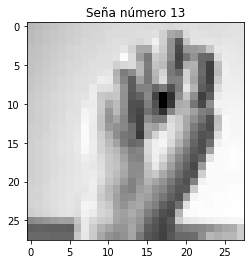

In [ ]:
plt.imshow(X_train[4].reshape((28, 28)), cmap="gray")
plt.title("Seña número {}".format(y_train[4]))

Es importante aclarar que los conjuntos de datos anteriores fueron diseñados para entrenar el modelo y que el mismo se ajuste. Y los siguientes conjuntos de datos son creados e instanciados para verificar la calidad del modelo.


In [ ]:
X_test = test_df.drop(["label"], axis=1).values
y_test = test_df["label"].values
print("El conjunto de prueba con pixeles e información es de {}".format(X_test.shape))
print("El conjunto de prueba con el target label es de {}".format(y_test.shape))

El conjunto de prueba con pixeles e información es de (7172, 784)
El conjunto de prueba con el target label es de (7172,)


# 3.Preparación de los datos
----

A continuación se presenta la manera en la cual se preparan los datos, se realiza un data cleaning y un preprocesamiento de los datos.


## 3.1 Datacleaning

---

En esta sección se realizará un datacleaning para conseguir los mejores datos 


In [ ]:
for column in train_df.columns:
  band = True 
  if train_df[column].isnull().sum() != 0 :
    print("Columna {} contiene {} cantidad de valores nulos".format(column,train_df[column].isnull().sum()))
    band = False

if band:
  print("No existen columnas con datos nulos")


No existen columnas con datos nulos


Los datasets que se instanciaron en este proyecto se encuentran previamente limpios por lo que no se encontraron variables o datos nulos o atipicos.


## 3.1 Normalización de datos


Gray scale normalization

In [ ]:
X_train = X_train / 255
X_test = X_test / 255

Etiqueta en valores categoricos

In [ ]:
from keras.utils.np_utils import to_categorical

y_train = to_categorical(y_train, 25)
y_test = to_categorical(y_test, 25)


In [ ]:
# from sklearn.preprocessing import LabelBinarizer

# label_binarizer = LabelBinarizer()
# y_train = label_binarizer.fit_transform(y_train)
# y_test = label_binarizer.fit_transform(y_test)


In [ ]:
print("y_train shape:", y_train.shape)
print("Categorial y_train sample 4 value:", y_train[6])

y_train shape: (27455, 25)
Categorial y_train sample 4 value: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


# 4.Modelamiento 
---

A continuación se presenta la creación de un modelo de aprendizaje de maquina supervisado con la finalidad de clasificar y enunciar el tipo de señas que se esta realizando 


Una vez preparados los datos de entrada se realizarán algunos modelos y se irán evaluando sus resultados de modo que finalmente se consiga un buen modelamiento.
Inicialmente se plantea una red neuronal usando el modelo Sequential de Keras, es decir, crearemos capas "una delante de otra".

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

Este primer modelo consta de 2 capas densas con 512 neuronas y función de activación relu, además se usa la regularización Dropout con un valor de 0.2, esta capa de Keras nos permite indicar la proporción de ceros que se inyectan en los pesos, esto con el objetivo de disminuir el overfitting.

Finalmente se tendrá una capa de sálida con 25 neuronas, se una una neurona por cada label del dataset y aprovechamos la función de activación **softmax** que tiende a devolver valores entre 0 y 1, un resultado adecuado para clasificar muestras con válores categóricos.

In [ ]:
model_1 = Sequential()
model_1.add(Dense(512, input_shape=(784,), activation="relu"))
model_1.add(Dropout(0.2))
model_1.add(Dense(512, activation="relu"))
model_1.add(Dropout(0.2))
model_1.add(Dense(25, activation="softmax"))
model_1.summary()

model_1.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])
history_1 = model_1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=128, verbose=0)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 512)               401920    
                                                                 
 dropout_5 (Dropout)         (None, 512)               0         
                                                                 
 dense_13 (Dense)            (None, 512)               262656    
                                                                 
 dropout_6 (Dropout)         (None, 512)               0         
                                                                 
 dense_14 (Dense)            (None, 25)                12825     
                                                                 
Total params: 677,401
Trainable params: 677,401
Non-trainable params: 0
_________________________________________________________________


En este caso se propone un modelo más simple, consta de una capa densa de 500 neruonas y la capa de sálida previamente señalada.

In [ ]:
model_2 = Sequential()
model_2.add(Dense(500, input_shape=(784,), activation="relu"))
model_2.add(Dense(25, activation="softmax"))
model_2.summary()

model_2.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
history_2 = model_2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=256, verbose=0)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 500)               392500    
                                                                 
 dense_16 (Dense)            (None, 25)                12525     
                                                                 
Total params: 405,025
Trainable params: 405,025
Non-trainable params: 0
_________________________________________________________________


Cuando existe una gran cantidad de neuronas en una capa se puede categorizar de manera más especifica, el problema que surge es que al categorizar de esta forma se puede producir overfitting, una estrategia interesante es reducir la cantidad de neuronas de 500 a 50.

In [ ]:
model_3 = Sequential()
model_3.add(Dense(50, input_shape=(784,), activation="relu"))
model_3.add(Dense(25, activation="softmax"))
model_3.summary()

model_3.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
history_3 = model_3.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=256, verbose=0)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 50)                39250     
                                                                 
 dense_18 (Dense)            (None, 25)                1275      
                                                                 
Total params: 40,525
Trainable params: 40,525
Non-trainable params: 0
_________________________________________________________________


En este caso añadimos nuevamente el dropout para reducir el sobreajuste.

In [ ]:
model_4 = Sequential()
model_4.add(Dense(50, input_shape=(784,), activation="relu"))
model_4.add(Dropout(0.3))
model_4.add(Dense(25, activation="softmax"))
model_4.summary()

model_4.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
history_4 = model_4.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=256, verbose=0)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 50)                39250     
                                                                 
 dropout_7 (Dropout)         (None, 50)                0         
                                                                 
 dense_20 (Dense)            (None, 25)                1275      
                                                                 
Total params: 40,525
Trainable params: 40,525
Non-trainable params: 0
_________________________________________________________________


Finalmente se opta por 2 capas densas, una de 200 y otra de 100 neuronas con sus dropouts de 0.4, esto para categorizar mejor las entradas y evitar también el sobreajuste.

In [ ]:
model_5 = Sequential()
model_5.add(Dense(200, input_shape=(784,), activation="relu"))
model_5.add(Dropout(0.4))
model_5.add(Dense(100, input_shape=(784,), activation="relu"))
model_5.add(Dropout(0.4))
model_5.add(Dense(25, activation="softmax"))
model_5.summary()

model_5.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
history_5 = model_5.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=256, verbose=0)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 200)               157000    
                                                                 
 dropout_8 (Dropout)         (None, 200)               0         
                                                                 
 dense_22 (Dense)            (None, 100)               20100     
                                                                 
 dropout_9 (Dropout)         (None, 100)               0         
                                                                 
 dense_23 (Dense)            (None, 25)                2525      
                                                                 
Total params: 179,625
Trainable params: 179,625
Non-trainable params: 0
_________________________________________________________________


# 5.Evaluación del modelamiento
----

En esta sección se pondrá aprueba el modelo, aprovechamos el valor retornado por model.fit() usando la información de validación pasandole los datos de test como entrada, es importante notar que la validación es un paso adicional en el desarrollo de un modelo, en nuestro caso la usamos con los datos de test para obtener métricas rápidamente.

Definimos una función para plotear los valores retornados por `model.fit()` que corresponden al loss y accuracy de la validación y entrenamiento.

In [ ]:
def plot(h, nEpochs):
  LOSS = 0
  ACCURACY = 1
  training = np.zeros((2, nEpochs))
  testing = np.zeros((2, nEpochs))
  training[LOSS] = h.history['loss']
  testing[LOSS] = h.history['val_loss']
  training[ACCURACY] = h.history['accuracy']
  testing[ACCURACY] = h.history['val_accuracy']

  epochs= range(1, nEpochs+1)
  fig, axs = plt.subplots(1,2, figsize=(17, 5))

  for i, label in zip((LOSS, ACCURACY), ('loss', 'accuracy')):
    axs[i].plot(epochs, training[i], 'b-', label='Training '+label)
    axs[i].plot(epochs, testing[i], 'y-', label='Test '+label)
    axs[i].set_title('Training and test '+label)
    axs[i].set_xlabel('Epochs')
    axs[i].set_ylabel(label)
    axs[i].legend()
  plt.show()

En este caso el loss de los datos de prueba es muy alto y el accuracy se encuentra entre 0.7 y 0.8, esto quiere decir que se cometieron grandes errores en una buena proporción de los datos de prueba.

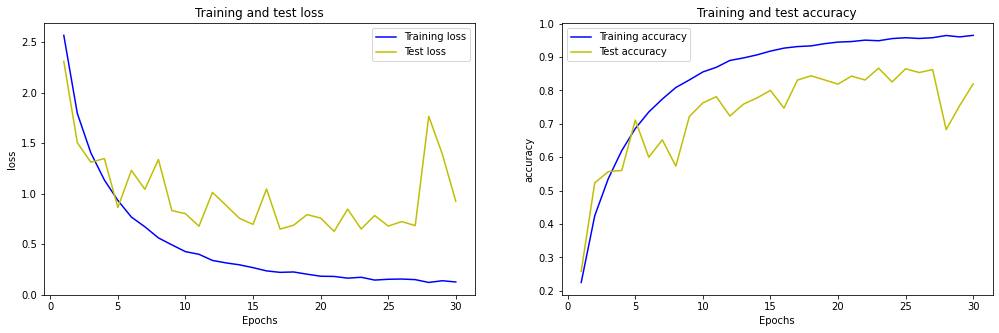

In [ ]:
plot(history_1, 30)

En el modelo 2, que fue simplificado el loss disminuye significativamente pero aún se evidencia un gran sobreajuste, además el accuracy disminuye bastante por lo que podemos intunir que se produjeron errores (no tan grandes como en el caso anterior) en una buena proporción de la información de prueba.

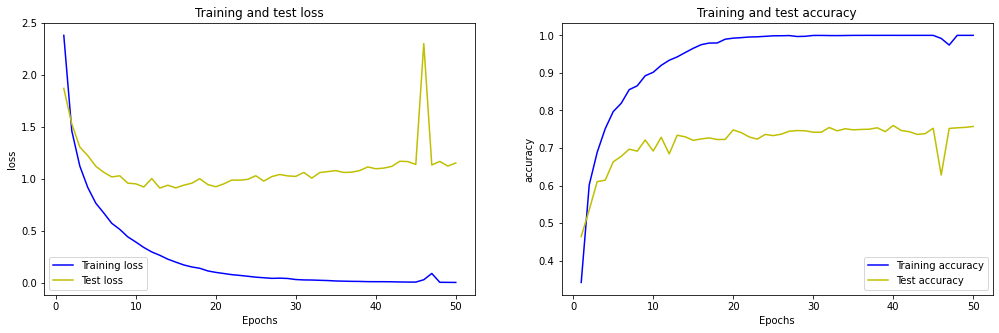

In [ ]:
plot(history_2, 50)

Vemos como se avanza hacia una dirección correcta, el sobreajuste cada vez es menor, aquí es importante notar que el accuracy también ha disminuido pero podemos concluir que cada vez se cometen menos erroes y menos graves.

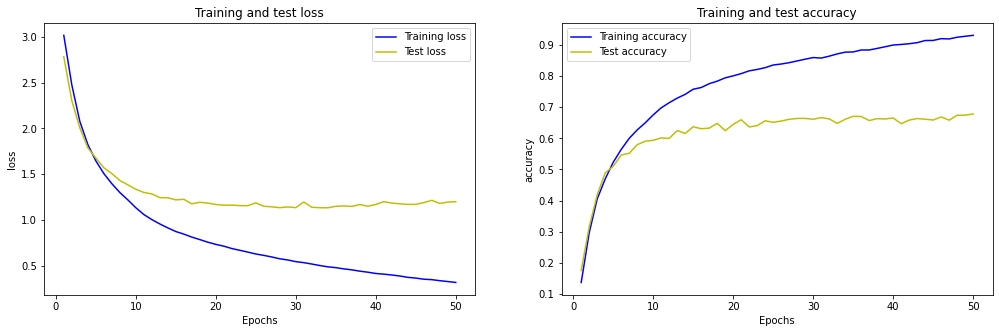

In [ ]:
plot(history_3, 50)

En el caso del modelo 4 vemos como el sobreajuste ha desparecido, el loss es practicamente nulo pero el accuracy aún no es muy alto, el modelo puede mejorar.

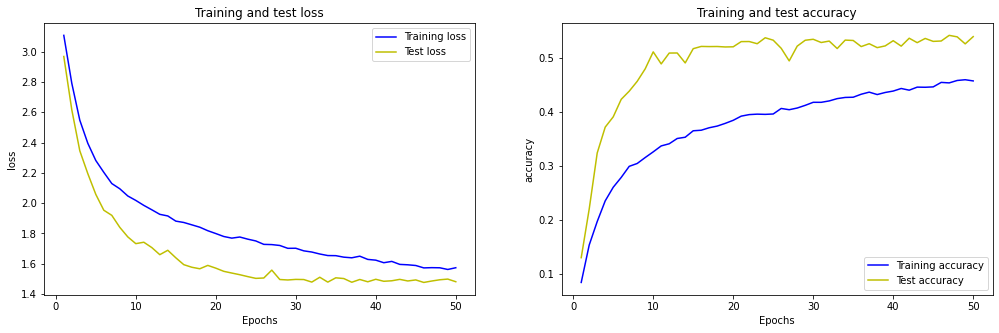

In [ ]:
plot(history_4, 50)

Finalmente llegamos al modelo N° 5 que nos entrega un accuracy del 0.7 apróximadamente pero con un ajuste más óptimo.

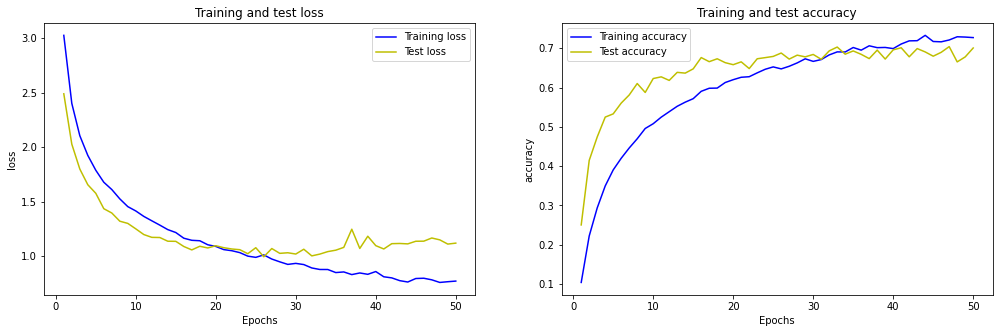

In [ ]:
plot(history_5, 50)

## 1. Uso de cámara

---

A continuación se hace uso de la cámara por parte del usuario para que este verifique la calidad y el desempeño del modelo por su propia cuenta


In [ ]:
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [ ]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)

  # get photo data
  data = eval_js('takePhoto({})'.format(quality))
  # get OpenCV format image
  img = js_to_image(data) 
  cv2.imwrite(filename, img)

  return filename

<IPython.core.display.Javascript object>

La imagen capturada fue :


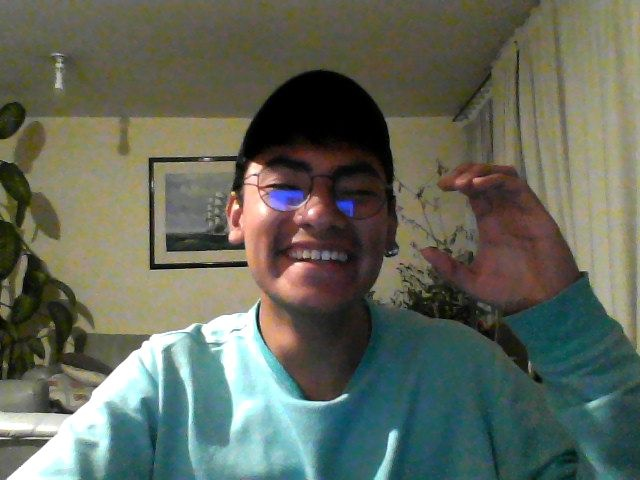

In [ ]:
from IPython.display import Image
try:
  filename = take_photo("test.jpg")
  
  # Show the image which was just taken.
  print("La imagen capturada fue :")
  display(Image(filename))

except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
from PIL import Image
def camera_recognition():

  # Get image and convert into array 

  img = cv2.imread("test.jpg", cv2.IMREAD_GRAYSCALE)
  img_pil = Image.fromarray(img)
  img_28x28 = np.array(img_pil.resize((28,28), Image.ANTIALIAS))
  img_array = (img_28x28.flatten())
  img_array = (img_array.reshape(-1,1).T/255)[0]

  # Make prediction 

  y_pred = model_5.predict(np.array([img_array,]))
  y_pred = model_5.predict(np.array([X_test[13],]))

  print("La seña que se detectó fue {}".format(np.argmax(y_pred))) 
  return img_array
  

A continuación se muestra como el modelo ajusta la imagen tomada por el computador y realiza una segmentación de pixeles ajustandolos a un tamaño de 28x28

1/1 [==============================] - 0s 19ms/step
La seña que se detectó fue 12


Text(0.5, 1.0, 'Seña 621')

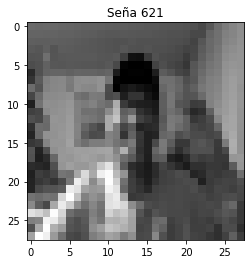

In [ ]:
img_array = camera_recognition()
plt.imshow(img_array.reshape(28,28), cmap="gray")
plt.title("Seña {}".format(np.argmax(img_array)))

A continuación se muestra la señal que el modelo logró clasificar y la que se encuentra en la base de datos

Text(0.5, 1.0, 'Seña 2')

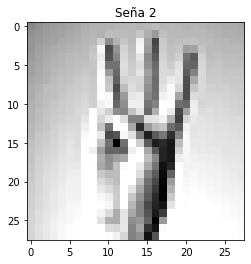

In [ ]:
plt.imshow(X_test[np.argmax(img_array)].reshape((28,28)), cmap="gray")
plt.title("Seña {}".format(np.argmax(y_test[20])))

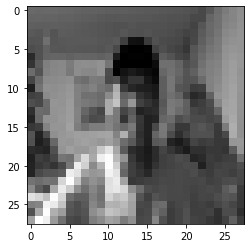

In [ ]:
plt.imshow(img_array.reshape((28,28)), cmap="gray")

# 6.Conclusiones 
----

* Se pudo evidenciar que no existe un conjunto de datos grande gratiuto o de acceso público que contenga imagenes sobre lengua de señas colombiano, es por ello, que se realizó el entrenamiento del modelo con el conjunto de datos de lengua de señas americano el cuál es muy similar

* Se comprobo que el uso de una red neuronal secuencial sirve para clasificar objetos en imagenes, sin embargo, es muy sensible al tener imagenes que varian un poco o no son iguales en forma a las que el modelo conoce. Hecho que se puede comprobar al no tener un accuracy tan alto

* Se logró generar una herramienta que reconozca las señas que el usuario muestre a la camara pero no es capaz de decir que letra corresponde debido a que no se cuenta con una base de datos que relacione dicha seña con un significado. 
